In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
    pass

  def forward(self, inputs):
    return inputs @ self.weights + self.bias


In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
neur1 = Neuron(weights, bias)
print(neur1.forward(inputs))

tensor(4.8400)


2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
    pass

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [ ]:
LinNet = Linear(weights, biases)
print(LinNet.forward(inputs))

tensor([ 4.8400,  0.1700, 10.3900])


2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
class Linear:
  def __init__(self, n_neurons):
    self.weights = torch.rand((n_neurons, 4)).T
    self.biases = torch.rand((1, n_neurons))
    pass

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [ ]:
LinNet = Linear(10)
print(LinNet.forward(inputs))

tensor([[ 2.1748,  6.1153,  2.5445,  2.5941,  6.7963,  5.0474,  3.8558,  5.6294,
          2.7535,  5.7685],
        [ 2.7842,  5.5691,  4.0192,  4.2369,  5.2660,  6.6308,  0.8063,  2.9840,
          2.6133,  2.0155],
        [-0.2505,  1.2101,  2.3755,  1.8706,  3.7605,  1.9201,  3.9859,  4.0223,
         -0.2579,  3.4506]])


2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_neurons, n_features).T
    self.biases = torch.randn(1, n_neurons)
    pass

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [ ]:
LinNet = Linear(4, 10)
print(LinNet.forward(inputs))

tensor([[-11.8997,  -7.2141,  -1.6427,   1.8065,   1.6627,   3.6328,   3.4809,
           0.6382,   1.8355,  -3.3511],
        [-14.4261,  -8.1923,   5.2420,   0.4315,   0.6093,   2.8695,  -7.1360,
          -3.7902,   3.0821,  -8.8387],
        [ -2.9340,   1.8856,  -0.1386,  -2.7115,   3.6978,  10.7419,   6.0009,
           0.8221,  -4.6658,   0.8456]])


2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights_lay1 = torch.rand(n_neurons, n_features).T
    self.biases_lay1 = torch.rand(1, n_neurons)

    self.weights_lay2 = torch.rand(7, 10).T
    self.biases_lay2 = torch.rand(1, 7)
    pass

  def forward(self, inputs):
    lay_1 = inputs @ self.weights_lay1 + self.biases_lay1
    return lay_1 @ self.weights_lay2 + self.biases_lay2

In [ ]:
LinNet = Linear(4, 10)
print(LinNet.forward(inputs))

tensor([[26.0956, 21.8243, 30.2439, 23.8054, 34.7307, 30.9446, 25.4875],
        [25.0174, 19.4142, 27.9063, 22.9395, 32.2132, 29.0714, 23.1063],
        [14.0425, 11.0223, 15.5148, 11.7178, 16.9738, 15.1420, 12.6922]])


## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
from copy import deepcopy

In [ ]:
class ReLU:
  def forward(self, inputs):
    self.inputs = deepcopy(inputs)
    self.inputs[self.inputs < 0] = 0
    return self.inputs


In [ ]:
inputs = torch.randn(4,3)
print(inputs)

tensor([[-0.8563, -1.6551, -0.4568],
        [ 0.9436,  0.6104,  0.4359],
        [-0.6881, -1.7023, -0.3391],
        [ 0.1829, -1.9348,  1.4100]])


In [ ]:
a = ReLU()
print(a.forward(inputs))

tensor([[0.0000, 0.0000, 0.0000],
        [0.9436, 0.6104, 0.4359],
        [0.0000, 0.0000, 0.0000],
        [0.1829, 0.0000, 1.4100]])


2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
class Softmax:
  def forward(self, inputs):
    self.inputs = deepcopy(inputs)
    for i in range(len(self.inputs)):
      self.inputs[i] = torch.exp(self.inputs[i])/sum(torch.exp(self.inputs[i]))
    return self.inputs

In [ ]:
inputs = torch.randn(4,3)
print(inputs)

tensor([[ 0.9876,  2.1414, -0.3671],
        [ 0.3911, -0.0383, -0.0715],
        [ 1.9255,  0.6097, -1.2584],
        [ 0.0941,  1.1126, -0.8094]])


In [ ]:
a = Softmax()
print(a.forward(inputs))
b = torch.nn.Softmax(dim=1)
print(b(inputs))

tensor([[0.2258, 0.7159, 0.0583],
        [0.4385, 0.2854, 0.2761],
        [0.7635, 0.2048, 0.0316],
        [0.2396, 0.6634, 0.0971]])
tensor([[0.2258, 0.7159, 0.0583],
        [0.4385, 0.2854, 0.2761],
        [0.7635, 0.2048, 0.0316],
        [0.2396, 0.6634, 0.0971]])


2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ELU:
  def __init__(self, alpha):
    self.alpha = alpha
    pass

  def forward(self, inputs):
    self.inputs = deepcopy(inputs)
    self.inputs = torch.where(self.inputs < 0, (torch.exp(self.inputs) - 1)*self.alpha, self.inputs)
    return self.inputs

In [ ]:
inputs = torch.randn(4,3)
print(inputs)

tensor([[ 0.8944,  0.1714, -2.6517],
        [ 0.2815,  0.1733, -0.6631],
        [ 1.5013,  1.0396,  1.5339],
        [ 0.9329, -0.6591,  0.2946]])


In [ ]:
a = ELU(0.5)
print(a.forward(inputs))
b = torch.nn.ELU(alpha = 0.5)
print(b(inputs))

tensor([[ 0.8944,  0.1714, -0.4647],
        [ 0.2815,  0.1733, -0.2424],
        [ 1.5013,  1.0396,  1.5339],
        [ 0.9329, -0.2413,  0.2946]])
tensor([[ 0.8944,  0.1714, -0.4647],
        [ 0.2815,  0.1733, -0.2424],
        [ 1.5013,  1.0396,  1.5339],
        [ 0.9329, -0.2413,  0.2946]])


## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.sum((y_pred - y_true)**2)*(1/len(y_pred))

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_neurons, n_features).T
    self.biases = torch.randn(1, n_neurons)

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [ ]:
LinNet = Linear(4, 1)
y_pred = LinNet.forward(inputs)
print(y_pred)

tensor([[ 2.5918],
        [-3.0839],
        [ 4.0681]])


In [ ]:
loss = torch.nn.MSELoss()
print(loss(y_pred.flatten(), y))

tensor(12.4563)


In [ ]:
MSE = MSELoss()
print(MSE.forward(y_pred.flatten(), y))

tensor(12.4563)


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    return (-y_pred.log() * y.flatten()).sum(dim=1).mean()

In [ ]:
class Softmax:
  def forward(self, inputs):
    maxes = torch.max(inputs, 1, keepdim=True)[0]
    inputs_exp = torch.exp(inputs-maxes)
    inputs_exp_sum = torch.sum(inputs, 1, keepdim=True)
    probs = inputs_exp/inputs_exp_sum
    return torch.unsqueeze(torch.flatten(probs), -1)

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_neurons, n_features).T
    self.biases = torch.randn(1, n_neurons)
    pass

  def forward(self, inputs):
    temp = Softmax()

    return temp.forward(inputs @ self.weights + self.biases)

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],])
y = torch.tensor([1, 0, 0], dtype=torch.float32)

In [ ]:
LinNet = Linear(4, 3)
y_pred = LinNet.forward(inputs)
print(y_pred)

tensor([[9.1246e-04],
        [5.7020e-01],
        [6.4168e-06]])


In [ ]:
(-y_pred.log() * y.flatten()).sum(dim=1).mean()

tensor(6.5059)

In [ ]:
CCL = CategoricalCrossentropyLoss()
print(CCL.forward(y_pred, y))

tensor(6.5059)


CrossEntropyLoss w/ softmax

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class MSELossL2:
  def __init__(self, lambda_):
    # <создать атрибут объекта alpha>
    self.lambda_ = lambda_
    pass

  def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
    return torch.sum((y_pred - y_true)**2)*(1/len(y_pred))

  def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
    return self.lambda_*torch.sum(layer)

  def forward(self, y_pred, y_true, layer):
    return self.data_loss(y_pred, y_true) + self.reg_loss(layer)

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_neurons, n_features).T
    self.biases = torch.randn(1, n_neurons)

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],])
y = torch.tensor([1, 0, 0], dtype=torch.float32)

In [ ]:
LinNet = Linear(4, 3)
y_pred = LinNet.forward(inputs)
print(y_pred)

tensor([[-1.5487, -0.3786,  4.5469]])


In [ ]:
MSEL2 = MSELossL2(0.1)
print(MSEL2.forward(y_pred.flatten(), y, LinNet.weights))

tensor(9.2077)


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
  def forward(self, c, y_true):
    E = (c-y_true)**2
    return E

  def backward(self, c, y_true):
    self.dinput = 2*(c-y_true)


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.w = torch.randn(n_inputs)
    self.b = torch.randn(1)


  def forward(self, inputs):
    self.inputs=inputs
    return torch.dot(inputs, self.w)+self.b   #dot для переумножения одинаковых векторов

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = self.inputs*dvalue #
    self.dinput =  dvalue * self.w# df/wX
    self.dbias = dvalue# df/db


In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(torch.float32)
y = torch.from_numpy(y).to(torch.float32)

In [ ]:
X.size(), y.size()

(torch.Size([100, 4]), torch.Size([100]))

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
n_inputs = X.size()[1]
lr = 0.01 #  скорость обучения
n_epoch = 1000 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

In [ ]:
losses = []
for epoch in range(n_epoch):
  for x_example, y_example in zip(X, y):

    # forward pass
    y_pred = neuron.forward(x_example)
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)
    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.w -= lr*neuron.dweights
    neuron.b -= lr*neuron.dbias

In [ ]:
coef

array([78.22060004, 43.58508313, 40.24161805, 34.49552423])

In [ ]:
neuron.w

tensor([78.2206, 43.5851, 40.2416, 34.4955])

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


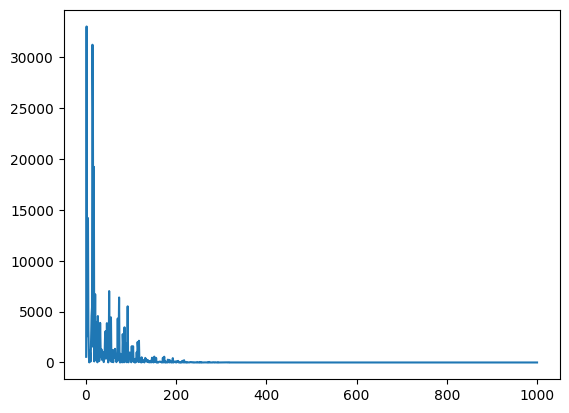

In [ ]:
index = np.arange(1, len(losses)+1)
plt.plot(index[:1000], losses[:1000])

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(torch.float32)
y = torch.from_numpy(y).to(torch.float32)

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

  def backward(self, y_pred, y_true):

    self.dinput = (2/(y_pred.size()[0])*(y_pred-y_true))


In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.w = torch.randn(n_inputs)
    self.b = torch.randn(1)


  def forward(self, inputs):
    self.inputs=inputs
    return inputs @ self.w +self.b   #dot для переумножения одинаковых векторов

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = self.inputs.T@dvalue #
    self.dinput =  dvalue.view(-1,1) @ self.w.view(1,-1)# df/wX,
    self.dbias = dvalue.sum()# df/db


In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.sum((y_pred - y_true)**2, dim=-1) #L

    def backward(self, y_pred, y_true):
        self.dinput = (-2/y_pred.size()[0])*(y_true-y_pred).view(-1, 1)# dL/dy^


class Linear:
    def __init__(self, n_inputs):
        self.n_inputs = n_inputs
        self.w = torch.randn(n_inputs)
        self.b = torch.randn(1)

    def forward(self, inputs):
        self.inputs=inputs
        return inputs @ self.w +self.b

    def backward(self, dvalue):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dweights = self.inputs.view(-1, self.n_inputs).T@dvalue #
        self.dinput =  dvalue.view(-1,1) @ self.w.view(1,-1)# df/wX,
        self.dbias = dvalue.sum()# df/db

In [ ]:
n_inputs = X.size()[1]
lr = 0.01 #  скорость обучения
n_epoch = 1000 #  количество эпох

neuron = Linear(n_inputs)
loss = MSELoss()

In [ ]:
losses = []
for epoch in range(400):
    # forward pass
    for x_example, y_example in zip(X, y):
        y_pred = neuron.forward(x_example)# <прогон через нейрон>
        curr_loss = loss.forward(y_pred, y_example)# <прогон через функцию потерь>
        losses.append(curr_loss)

        # backprop
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)
        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.w -= lr*neuron.dweights.squeeze(1)
        neuron.b -= lr*neuron.dbias

In [ ]:
coef

array([20.62621667, 90.26755783, 97.18999266,  3.29265519])

In [ ]:
neuron.w

tensor([20.6262, 90.2675, 97.1900,  3.2927])

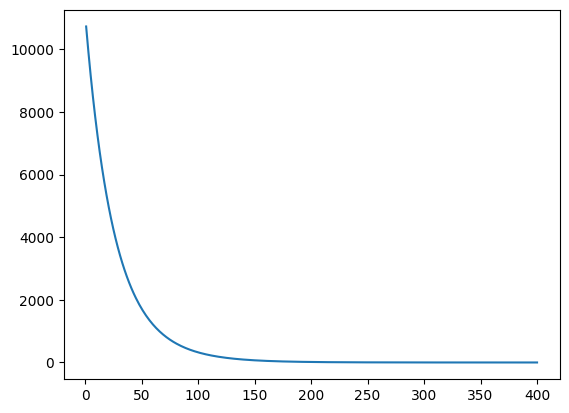

In [ ]:
index = np.arange(1, len(losses)+1)
plt.plot(index[:1000], losses[:1000])

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.sum((y_pred - y_true)**2, dim=-1) #L

  def backward(self, y_pred, y_true):
    self.dinput = (-2/y_pred.size()[0])*(y_true-y_pred)# dL/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.w = torch.randn(n_inputs)
    self.b = torch.randn(1)

  def forward(self, inputs):
    self.inputs=inputs
    return inputs @ self.w +self.b

  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dweights = self.inputs.T@dvalue #
    self.dinput =  dvalue.view(-1,1) @ self.w.view(1,-1)# df/wX,
    self.dbias = dvalue.sum()# df/db

2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(torch.float32)
y = torch.from_numpy(y).to(torch.float32)

In [ ]:
y.shape

torch.Size([100])

In [ ]:
n_inputs = X.size()[1] # <размерность элемента выборки >
lr = 0.1 #  скорость обучения
n_epoch = 1000 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()


for epoch in range(n_epoch):
    # forward pass
    y_pred = neuron.forward(X)# <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)# <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)
    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.w -= lr*neuron.dweights
    neuron.b -= lr*neuron.dbias

In [ ]:
coef

array([86.71079947, 56.53325444, 75.53639047, 58.83741709])

In [ ]:
neuron.w

tensor([86.7106, 56.5331, 75.5361, 58.8376])

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return ((y_pred.view(-1, 1) - y_true.view(-1, 1)) ** 2).mean()

    def backward(self, y_pred, y_true):
        self.dinput = -2 *(y_true.view(-1, 1) - y_pred.view(-1, 1)) / y_true.shape[0]

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 300  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

In [ ]:
coef

array([75.88696861, 90.98119806, 26.21116842, 54.53217477])

In [ ]:
layer.weights

tensor([[75.9012],
        [90.8868],
        [26.2667],
        [54.4496]])

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.01

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 0.5370511412620544
epoch 200 mean loss 0.04647371917963028
epoch 400 mean loss 0.02737927995622158
epoch 600 mean loss 0.021200325340032578
epoch 800 mean loss 0.018066728487610817
epoch 1000 mean loss 0.015975648537278175
epoch 1200 mean loss 0.014549699611961842
epoch 1400 mean loss 0.013575254939496517
epoch 1600 mean loss 0.01282261498272419
epoch 1800 mean loss 0.012226313352584839
epoch 2000 mean loss 0.01176136638969183


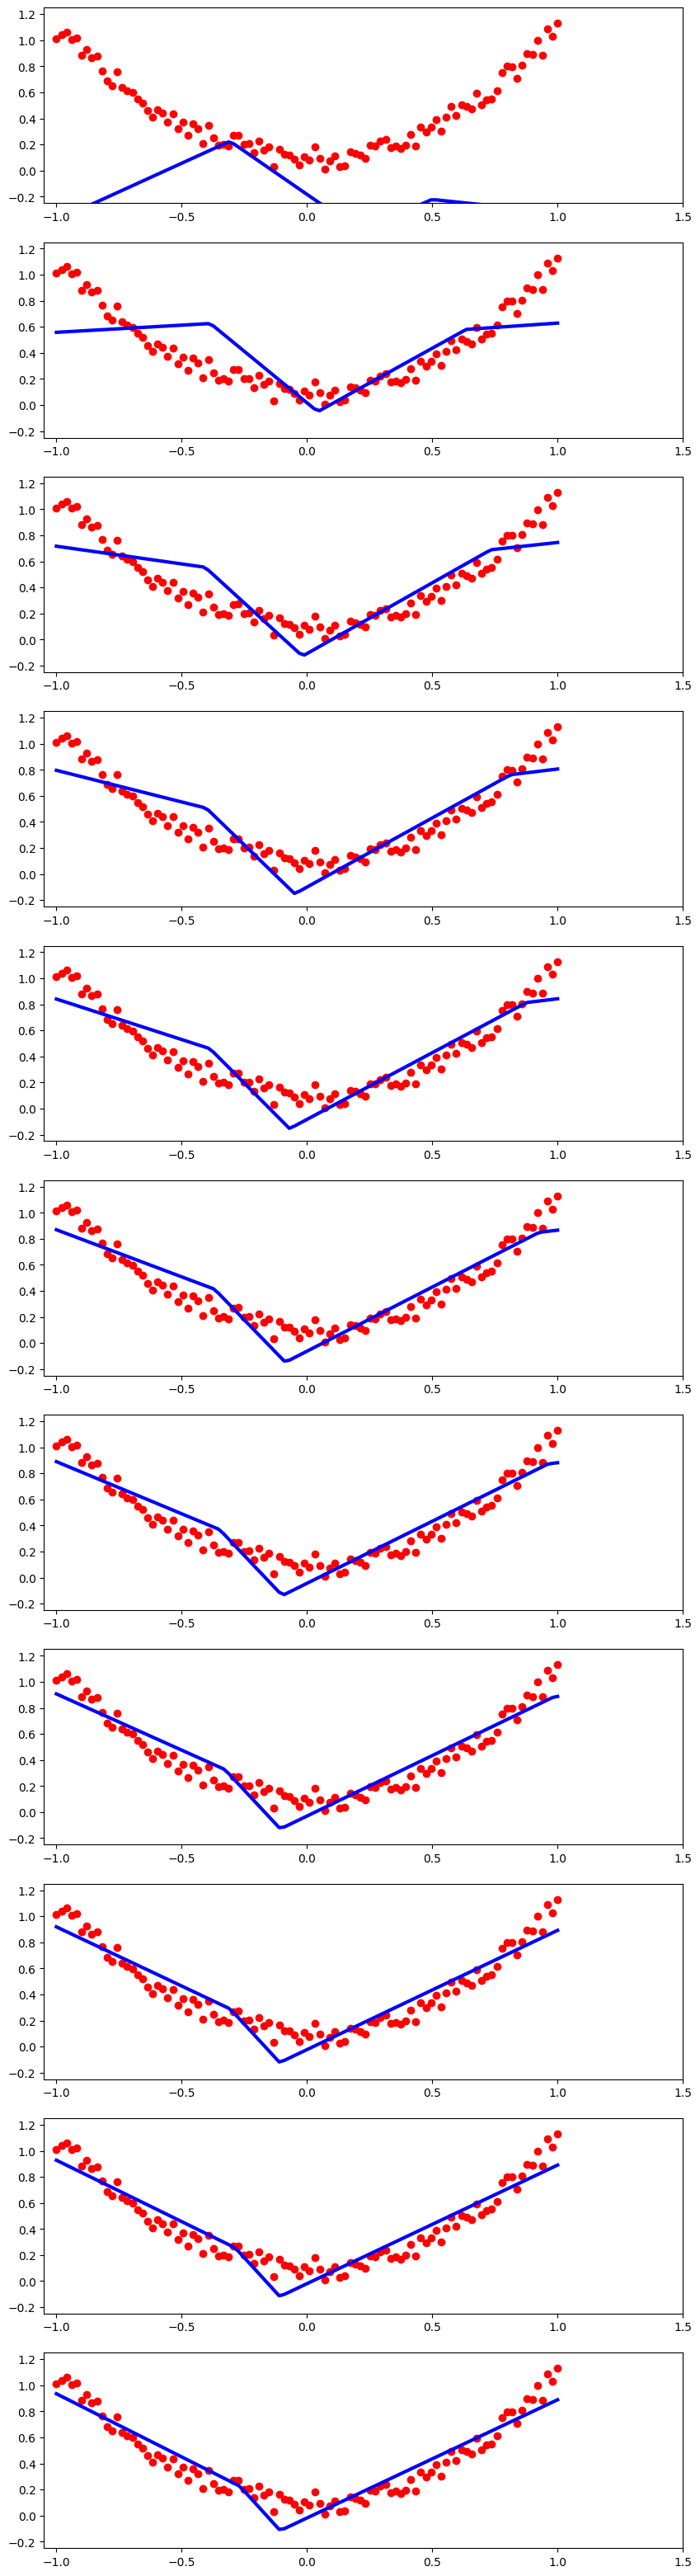

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "red")
  ax.plot(X.numpy(), y_.numpy(), 'b-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)